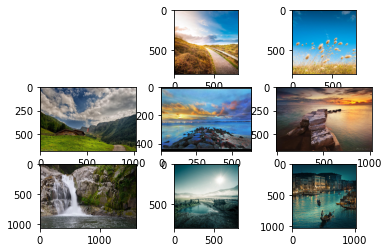

In [42]:
# plot the first 9 images in the landscape dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 't' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [50]:
# load and summarize the mapping file for the landscape dataset
from pandas import read_csv
# load file as CSV
filename = r'C:\Users\pc\Desktop\LANDSCAPE\train_landscape.csv'
mapping_csv = read_csv(filename)
# summarize properties
print(mapping_csv.shape)
print(mapping_csv[:10])

(25, 12)
  image_name                               tags  clouds  houses  hills  trees  \
0         t1              clouds,hills,soil,sun       1       0      1      0   
1         t2                clouds,flowers,soil       1       0      0      0   
2         t3     clouds,trees,hills,houses,soil       1       1      1      1   
3         t4        clouds,water,sun,soil,rocks       1       0      0      0   
4         t5             clouds,water,sun,rocks       1       0      0      0   
5         t6                        water,rocks       0       0      0      0   
6         t7  clouds,water,sun,soil,rocks,hills       1       0      1      0   
7         t8                       houses,water       0       1      0      0   
8         t9                       clouds,hills       1       0      1      0   
9        t10                  clouds,hills,soil       1       0      1      0   

   flowers  bridge  soil  sun  water  rocks  
0        0       0     1    1      0      0  
1      

In [51]:
# create a mapping of tags to integers
from pandas import read_csv
 
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map
 
# load file as CSV
filename = r'C:\Users\pc\Desktop\LANDSCAPE\train_landscape.csv'
mapping_csv = read_csv(filename)
# create a mapping of tags to integers
mapping, inv_mapping = create_tag_mapping(mapping_csv)
print(len(mapping))
print(mapping)

23
{'clouds,flowers,soil': 0, 'clouds,hills': 1, 'clouds,hills,soil': 2, 'clouds,hills,soil,sun': 3, 'clouds,hills,trees,water': 4, 'clouds,hills,water,soil': 5, 'clouds,houses,hills,trees,soil': 6, 'clouds,soil': 7, 'clouds,trees,hills,houses,soil': 8, 'clouds,trees,hills,soil': 9, 'clouds,water,houses,rocks,soil': 10, 'clouds,water,rocks,soil': 11, 'clouds,water,sun,rocks': 12, 'clouds,water,sun,rocks,soil': 13, 'clouds,water,sun,soil,rocks': 14, 'clouds,water,sun,soil,rocks,hills': 15, 'hills,water,flowers,trees': 16, 'houses,water': 17, 'sun,water,rocks,soil': 18, 'sun,water,soil': 19, 'trees,flowers,rocks,water': 20, 'trees,water,bridge,hills,soil': 21, 'water,rocks': 22}


In [52]:

# create a mapping of filename to tags
def create_file_mapping(mapping_csv):
	mapping = dict()
	for i in range(len(mapping_csv)):
		name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
		mapping[name] = tags.split(' ')
	return mapping

In [56]:
# load and prepare landscape dataset and save to file
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
 
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map
 
# create a mapping of filename to a list of tags
def create_file_mapping(mapping_csv):
	mapping = dict()
	for i in range(len(mapping_csv)):
		name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
		mapping[name] = tags.split(' ')
	return mapping
 
# create a one hot encoding for one list of tags
def one_hot_encode(tags, mapping):
	# create empty vector
	encoding = zeros(len(mapping), dtype='uint8')
	# mark 1 for each tag in the vector
	for tag in tags:
		encoding[mapping[tag]] = 1
	return encoding
 
# load all images into memory
def load_dataset(path, file_mapping, tag_mapping):
	photos, targets = list(), list()
	# enumerate files in the directory
	for filename in listdir(folder):
		# load image
		photo = load_img(path + filename, target_size=(128,128))
		# convert to numpy array
		photo = img_to_array(photo, dtype='uint8')
		# get tags
		tags = file_mapping[filename[:-4]]
		# one hot encode tags
		target = one_hot_encode(tags, tag_mapping)
		# store
		photos.append(photo)
		targets.append(target)
	X = asarray(photos, dtype='uint8')
	y = asarray(targets, dtype='uint8')
	return X, y
 
# load the mapping file
filename = r'C:\Users\pc\Desktop\LANDSCAPE\train_landscape.csv'
mapping_csv = read_csv(filename)
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
# load the jpg images
folder = 'train/'
X, y = load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
# save both arrays to one file in compressed format
savez_compressed(r'C:\Users\pc\Desktop\LANDSCAPE\landscape_data.zip', X, y)

(25, 128, 128, 3) (25, 23)


In [93]:
#precision = true positives / (true positives + false positives)
#recall = true positives / (true positives + false negatives)
#F1 = 2 x (precision x recall) / (precision + recall)
#F-Beta = (1 + Beta^2) x (precision x recall) / (Beta^2 x precision + recall)
#score = fbeta_score(y_true, y_pred, 2, average='samples')


In [94]:
# test f-beta score
from numpy import load
from numpy import ones
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\landscape_data.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# load dataset
trainX, trainY, testX, testY = load_dataset()
# make all one predictions
train_yhat = asarray([ones(trainY.shape[1]) for _ in range(trainY.shape[0])])
test_yhat = asarray([ones(testY.shape[1]) for _ in range(testY.shape[0])])
# evaluate predictions
train_score = fbeta_score(trainY, train_yhat, average='samples',beta=2)
test_score = fbeta_score(testY, test_yhat, average='samples',beta=2)
print('All Ones: train=%.3f, test=%.3f' % (train_score, test_score))

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
All Ones: train=0.185, test=0.185


In [95]:
# compare f-beta score between sklearn and keras
from numpy import load
from numpy import ones
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from keras import backend
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\landscape_data.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 2
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score
 
# load dataset
trainX, trainY, testX, testY = load_dataset()
# make all one predictions
train_yhat = asarray([ones(trainY.shape[1]) for _ in range(trainY.shape[0])])
test_yhat = asarray([ones(testY.shape[1]) for _ in range(testY.shape[0])])
# evaluate predictions with sklearn
train_score = fbeta_score(trainY, train_yhat, average='samples',beta=2)
test_score = fbeta_score(testY, test_yhat, average='samples',beta=2)
print('All Ones (sklearn): train=%.3f, test=%.3f' % (train_score, test_score))
# evaluate predictions with keras
train_score = fbeta(backend.variable(trainY), backend.variable(train_yhat))
test_score = fbeta(backend.variable(testY), backend.variable(test_yhat))
print('All Ones (keras): train=%.3f, test=%.3f' % (train_score, test_score))

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
All Ones (sklearn): train=0.185, test=0.185
All Ones (keras): train=0.185, test=0.185


In [96]:
# baseline model for the landscape dataset
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\landscape_data.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-label classification
def fbeta(y_true, y_pred, beta=2):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 2
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score
 
# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=23):
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(out_shape, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
	return model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 64)        5

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
> loss=1.275, fbeta=0.000


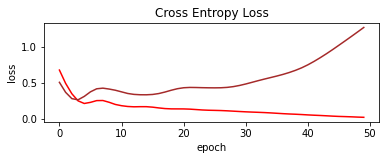

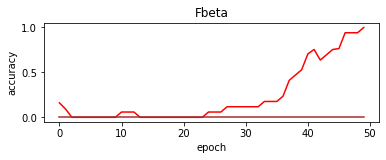

In [104]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='red', label='train')
    pyplot.plot(history.history['val_loss'], color='brown', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.show()
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='red', label='train')
    pyplot.plot(history.history['val_fbeta'], color='brown', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('accuracy')
    pyplot.show()
    # save plot to file
    folder = sys.argv[0].split('/')[-1]
    pyplot.savefig(folder + '_plot.png')
    pyplot.close()
 
 #run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow(trainX, trainY, batch_size=128)
	test_it = datagen.flow(testX, testY, batch_size=128)
	# define model
	model = define_model()
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	loss, fbeta = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
	# learning curves
	summarize_diagnostics(history)
 
 #entry point, run the test harness
run_test_harness()